In [103]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install keras
!pip install tensorflow
!pip install pmdarima

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached Cython-3.0.11-cp38-cp38-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/615.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/615.5 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/615.5 kB ? eta -:--:--
   ---------------------------------------- 615.5/615.5 kB 2.8 MB/s eta 0:00:00
Using cached Cython-3.0.11-cp38-cp38-win_amd64.whl (2.8 MB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.0 MB 4.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.0 MB 2.8 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/10.0 MB 2.6 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/10.0 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/10.0 MB 2.5 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/10.0 MB 2.4 MB/s eta 0:00:04
   ------------- -------------------------

In [30]:
# # Load the data
df = pd.read_csv('stock_price.csv')

In [32]:
# Check the columns in the dataframe
print(df.columns)



Index(['date', 'closing price', 'opening price', 'high price', 'low price',
       'settlement price', 'change rate %'],
      dtype='object')


       closing price  opening price   high price    low price
count    9202.000000    9202.000000  9202.000000  9202.000000
mean       92.180961      92.256183    93.176451    91.330146
std        50.452228      50.598215    51.049837    50.087405
min        33.000000      33.000000    33.200000    32.200000
25%        52.000000      52.100000    52.800000    51.500000
50%        85.100000      85.100000    86.050000    84.200000
75%       110.800000     110.800000   111.900000   109.275000
max       305.900000     309.800000   311.800000   303.900000
date                0
closing price       0
opening price       0
high price          0
low price           0
settlement price    0
change rate %       0
dtype: int64


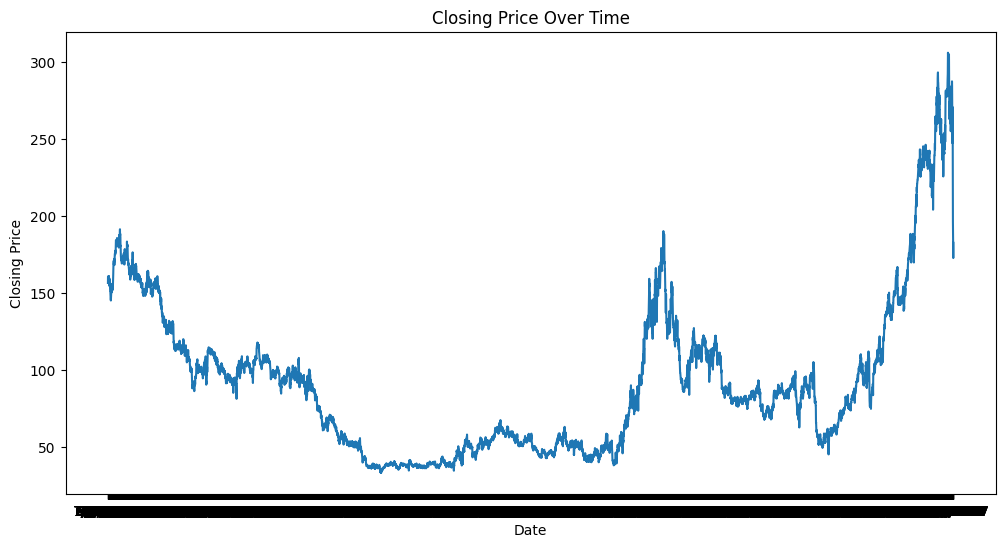

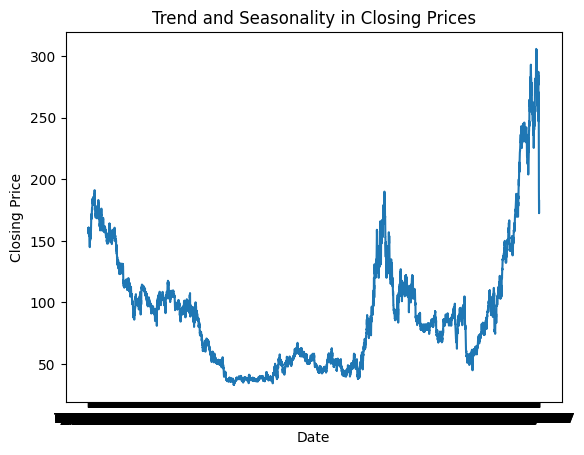

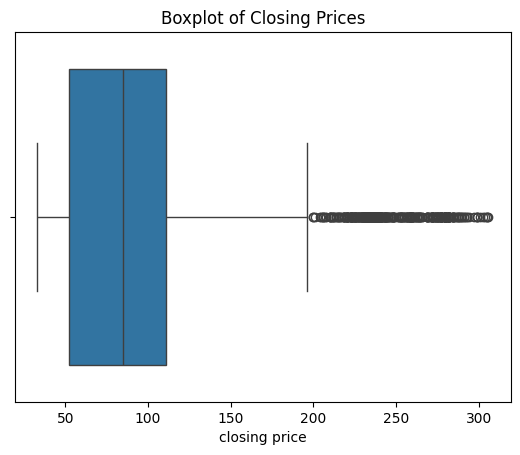

In [33]:
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Plotting the closing price over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['closing price'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Detecting trends and seasonality
sns.lineplot(data=df, x='date', y='closing price')
plt.title('Trend and Seasonality in Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Identify outliers using boxplot
sns.boxplot(x=df['closing price'])
plt.title('Boxplot of Closing Prices')
plt.show()


In [54]:
# Check the data types of the columns
print(df.dtypes)


date                 object
closing price       float64
opening price       float64
high price          float64
low price           float64
settlement price     object
change rate %        object
dtype: object


In [86]:
# Remove any non-numeric characters and convert to float

df['change rate %'] = df['change rate %'].replace('[\%,]', '', regex=True).astype(float)
df['settlement price'] = df['settlement price'].replace('[\$,]', '', regex=True)
# Check to ensure the conversion was successful
print(df.dtypes)
df.head()

date                 object
closing price       float64
opening price       float64
high price          float64
low price           float64
settlement price     object
change rate %       float64
dtype: object


,date,closing price,opening price,high price,low price,settlement price,change rate %
0,8/1/2024,156.3,159.3,159.4,156.1,79.15,-2.56
1,7/31/2024,160.4,158.2,160.7,158.1,173.91,1.07
2,7/30/2024,158.7,158.8,159.2,158.0,138.14,-0.63
3,7/29/2024,159.7,158.7,160.2,158.4,126.28,1.14
4,7/26/2024,157.9,159.3,159.6,157.9,155.08,-0.13


In [92]:
# Function to convert M and B to numbers
def convert_to_float(x):
    if 'M' in x:
        return float(x.replace('M', '')) * 1e6
    elif 'B' in x:
        return float(x.replace('B', '')) * 1e9
    else:
        return float(x)

# Apply the conversion function to 'settlement price'
df['settlement price'] = df['settlement price'].apply(convert_to_float)

# Check to ensure the conversion was successful
print(df.dtypes)


date                 object
closing price       float64
opening price       float64
high price          float64
low price           float64
settlement price    float64
change rate %       float64
dtype: object


In [93]:
from sklearn.preprocessing import MinMaxScaler

# # Fill missing values
# df = df.fillna(method='ffill')

# Normalize the prices
scaler = MinMaxScaler()
df[['closing price', 'opening price', 'high price', 'low price', 'settlement price']] = scaler.fit_transform(df[['closing price', 'opening price', 'high price', 'low price', 'settlement price']])

# Create additional features like moving averages
df['ma_5'] = df['closing price'].rolling(window=5).mean()
df['ma_10'] = df['closing price'].rolling(window=10).mean()
df = df.dropna()

print(df.head())


         date  closing price  opening price  high price  low price  \
9   7/19/2024       0.461708       0.459176    0.458363   0.465587   
10  7/18/2024       0.468303       0.455564    0.459440   0.465219   
11  7/17/2024       0.464273       0.449783    0.454774   0.460802   
12  7/16/2024       0.455112       0.457009    0.454774   0.456754   
13  7/12/2024       0.460608       0.454841    0.456927   0.464851   

    settlement price  change rate %      ma_5     ma_10  
9       1.228359e-07          -1.12  0.462587  0.461414  
10      1.510859e-07           0.69  0.464566  0.463063  
11      1.344844e-07           1.59  0.465445  0.462807  
12      1.350703e-07          -0.95  0.462880  0.462257  
13      1.884531e-07          -0.50  0.462001  0.461891  


d:\DataCom Intern\study\Usecase_DemadForecasting1\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\DataCom Intern\study\Usecase_DemadForecasting1\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error: 0.3155140660184607


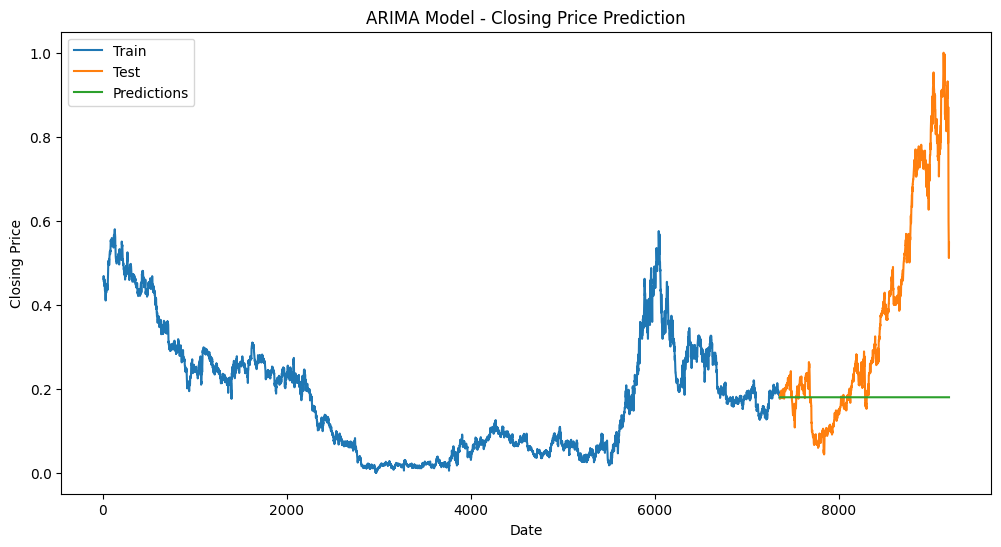

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error



# Extract the 'closing price' column for ARIMA
closing_prices = df['closing price']

# Split the data into training and testing sets
train, test = model_selection.train_test_split(closing_prices, test_size=0.2)

# Fit the ARIMA model
arima_model = pm.auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)

# Make predictions
predictions = arima_model.predict(n_periods=len(test))

# Calculate RMSE
rmse = mean_squared_error(test, predictions, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.title('ARIMA Model - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [111]:
# Scale the 'closing price' column separately
scaler = MinMaxScaler()
scaled_closing_price = scaler.fit_transform(df[['closing price']])

# Prepare the dataset for LSTM
def create_dataset(df, time_step=1):
    X, Y = [], []
    for i in range(len(df)-time_step-1):
        a = df[i:(i+time_step), :]
        X.append(a)
        Y.append(df[i + time_step, 0])
    return np.array(X), np.array(Y)

# Feature columns and target
features = ['closing price', 'opening price', 'high price', 'low price', 'settlement price', 'ma_5', 'ma_10']
target = 'closing price'

# Reshape data into (samples, time steps, features)
time_step = 10
X, Y = create_dataset(df[features].values, time_step)

X = X.reshape((X.shape[0], X.shape[1], len(features)))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, len(features))))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Make predictions on test set
test_predict = model.predict(X_test)

# Rescale values back to original scale
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, test_predict))
print(f'Root Mean Squared Error: {rmse}')

58/58 [==============================] - 1s 3ms/step
Root Mean Squared Error: 0.009530411023686689


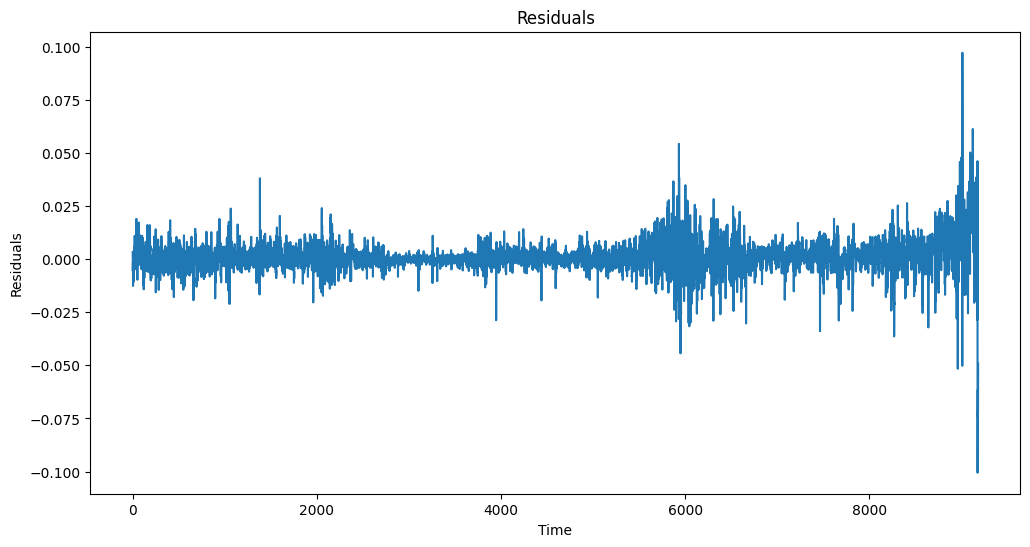

In [102]:
# Check residuals
residuals = Y - train_predict
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


In [112]:
from keras.layers import Bidirectional

# Build Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(time_step, len(features))))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Rescale values back to original scale
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))

print(f'Bidirectional LSTM - Train RMSE: {train_rmse}')
print(f'Bidirectional LSTM - Test RMSE: {test_rmse}')


58/58 [==============================] - 0s 3ms/step
Bidirectional LSTM - Train RMSE: 0.019885643386581806
Bidirectional LSTM - Test RMSE: 0.020094939804198936


In [113]:
from keras.layers import GRU

# Build GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(time_step, len(features))))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Rescale values back to original scale
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_predict))

print(f'GRU - Train RMSE: {train_rmse}')
print(f'GRU - Test RMSE: {test_rmse}')


58/58 [==============================] - 0s 2ms/step
GRU - Train RMSE: 0.005853440742434853
GRU - Test RMSE: 0.00658679261681514


In [ ]:
#  GRU model is performing spectacularly well—both train and test RMSE are impressively low. Meanwhile, the Bidirectional LSTM did fairly well but still trails behind the GRU.

# Comparison of RMSE:
# GRU Train RMSE: 0.00585
# GRU Test RMSE: 0.00659
# Bidirectional LSTM Train RMSE: 0.01989
# Bidirectional LSTM Test RMSE: 0.02009

# Clearly, GRU is the champ here. 